# Welcome Everyone!

*A little about me, I am a PhD canidate at Colorado School of Mines, in the [Chevron Center of Research Excellence](https://core.mines.edu/) research group*. Follow me on [twitter](https://twitter.com/ThomasM_geo)!

This is going to be a random exploration of well data, mainly focusing on viz! I won't go into as much detail into dataframe stuff, but will dive deeper into viz syntax! This will be a relatively entry level turtorial, but a working knowledge of basic pandas and python will be helpful. My talk last year would be a great introduction to this talk. The youtube is [here](https://www.youtube.com/watch?v=oytSwhqvKbc&t=1s) and the github repo is [here](https://github.com/ThomasMGeo/Transform2020).

Nice to have prerequisites for this turtorial (but not necessary):



*   imported a .csv into pandas
*   have made a plot in excel/matlab/python/R
* high level understanding of loops



 Thank you to Irene Wallis (github [here](https://github.com/ICWallis)) for  geothermal context and python tips/hints! Check out her T21 talk with Katie McLean this Thursday for a deep dive into geothrmal well performance in python. One not to be missed! Schedule [here](http://schedule.softwareunderground.org/) for that talk and all of transform. 

# Starting the python portion!

In [1]:
# We are going to use some version 3.3+ featrues!
!pip install matplotlib --upgrade

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.1)


In [2]:
import pandas as pd
import numpy as np
import datetime

from glob import glob

In [3]:
cd drive/My Drive/T21_well_bonanza

/content/drive/My Drive/T21_well_bonanza


# prepping data input

Let's use glob to collect all of the excel files we would like to load in. The * before the .xls will grab every excel file in the folder. Use with caution! More information on how to use glob is [here](https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/).

In [4]:
excel_files = glob("ca_geothermal_data/*.xls")
excel_files

['ca_geothermal_data/casad.xls',
 'ca_geothermal_data/coso.xls',
 'ca_geothermal_data/geysers.xls',
 'ca_geothermal_data/heber.xls',
 'ca_geothermal_data/saltons.xls']

In [5]:
df_prod = pd.DataFrame() # making a 

print('Geothermal Fields:')
for z in range(len(excel_files)):
  field = excel_files[z].replace('ca_geothermal_data/','').split('.xls')[0]
  print(field)
  if field == 'casad' :
    df_ = pd.read_excel(excel_files[z], skiprows=5, usecols=[1,2,3,4])
  else :
    df_ = pd.read_excel(excel_files[z], skiprows=6, usecols=[1,2,3,4])

  df_.columns = df_.columns.str.replace(' ', '') #

  if field == 'geysers' :
    df_.rename(columns={'Production(kilogramstimes1,000)': 'prod_MT', 
                       'Injection(kilogramstimes1,000)': 'injection_MT'}, inplace=True)
  else :
    df_.rename(columns={'Water(kilogramstimes1,000)': 'prod_MT', 
                       'Injection(kilogramstimes1,000)': 'injection_MT'}, inplace=True)
  
  df_.rename(columns={'Year': 'year', 
                      'Month': 'month'}, inplace=True)

  df_.replace('*', np.nan, inplace=True)
  df_ = df_.dropna(thresh=3)
  df_['field_name'] = field
  df_prod = df_prod.append(df_)

Geothermal Fields:
casad
coso
geysers
heber
saltons


The field names will need to be fixed, but good enough for now! Below is a map of the locations. 

<br>
<img src='https://drive.google.com/uc?id=17ccEKnfxE6MpDqITm_qdMMiQBijIJhBN'>

### QC'ing the data frame

In [6]:
df_prod.describe()

,year,month,prod_MT,injection_MT
count,2382.000000,2373.000000,2.382000e+03,2.371000e+03
mean,2000.042401,6.500211,4.363629e+06,3.182639e+06
std,12.559823,3.449787,2.832174e+06,2.437544e+06
min,1960.000000,1.000000,0.000000e+00,0.000000e+00
25%,1991.000000,4.000000,2.054466e+06,1.367841e+06
50%,2001.000000,7.000000,4.082838e+06,2.121199e+06
75%,2011.000000,9.000000,6.055216e+06,5.021998e+06
max,2021.000000,12.000000,1.267996e+07,1.020871e+07


Glad that the max month is 12, the years also make sense. 

In [7]:
df_prod.month.unique()

array([ 7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6., nan])

Checking out the months in the dataset .... we will have to fix that nan later. Geysers production was only tracked yearly early in it's life.

# cleaned data frame!

In [8]:
df_prod

,year,month,prod_MT,injection_MT,field_name
1,1984.0,7.0,2093.0,2077.0,casad
2,1984.0,8.0,715.0,715.0,casad
3,1984.0,9.0,17326.0,18084.0,casad
4,1984.0,10.0,52951.0,52951.0,casad
5,1984.0,11.0,1185043.0,894397.0,casad
...,...,...,...,...,...
461,2020.0,5.0,6258603.0,5446471.0,saltons
462,2020.0,6.0,11185769.0,9239716.0,saltons
463,2020.0,7.0,12045690.0,10050834.0,saltons
464,2020.0,8.0,11526198.0,9689633.0,saltons


### Creating a new columns

One thing I like to do 

In [9]:
df_prod['pro_minus_injection'] = df_prod.prod_MT.values - df_prod.injection_MT.values

Making a column of zero's for future datetime issues.

In [10]:
df_prod['day'] = 1 # not 0

In [11]:
df_prod.describe()

,year,month,prod_MT,injection_MT,pro_minus_injection,day
count,2382.000000,2373.000000,2.382000e+03,2.371000e+03,2.371000e+03,2382.0
mean,2000.042401,6.500211,4.363629e+06,3.182639e+06,1.201226e+06,1.0
std,12.559823,3.449787,2.832174e+06,2.437544e+06,1.497463e+06,0.0
min,1960.000000,1.000000,0.000000e+00,0.000000e+00,-1.682461e+06,1.0
25%,1991.000000,4.000000,2.054466e+06,1.367841e+06,9.224900e+04,1.0
50%,2001.000000,7.000000,4.082838e+06,2.121199e+06,7.955160e+05,1.0
75%,2011.000000,9.000000,6.055216e+06,5.021998e+06,1.779935e+06,1.0
max,2021.000000,12.000000,1.267996e+07,1.020871e+07,8.134885e+06,1.0


# matplotlib

Let's do a few plots in matplotlib. Matplotlib is a great package for scientific plotting, that is infinitely modifiable. A collection of fantastic cheat sheets are [here](https://github.com/matplotlib/cheatsheets).

In [12]:
import matplotlib.pyplot as plt

### histograms

This is a standard output of matplotlib histogram function. All it needs is an array. 

Text(0, 0.5, 'count')

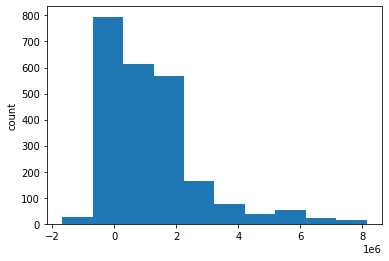

In [13]:
plt.hist(df_prod.pro_minus_injection.values)
plt.ylabel('count') # adding a y label

Nice! Let's add our widigets for the individual production and injection data. 

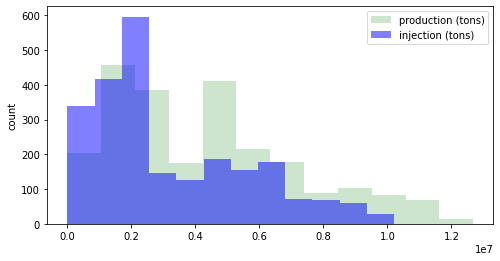

In [14]:
plt.figure(figsize=(8,4))
plt.hist(df_prod.prod_MT.values, bins=12, color='green', alpha=0.2, label='production (tons)')
plt.hist(df_prod.injection_MT.values, bins=12, color='blue', alpha=0.5, label='injection (tons)')
plt.ylabel('count')
plt.legend()

To unpack what we did:


*   set the number of bins (bins=12)
*   specified color
*   added a legend
*   set opacity using alpha
*   set figure size



Looking at this from a subsurface perspective for these 5 power plant complexes, there are some 'missing' subsurface mass.

A great paper to check out [here](https://www.sciencedirect.com/science/article/abs/pii/S1364032110002121) to learn more about reinjection for geothermal resources. 

### line plot

Text(0, 0.5, 'production in metric tons')

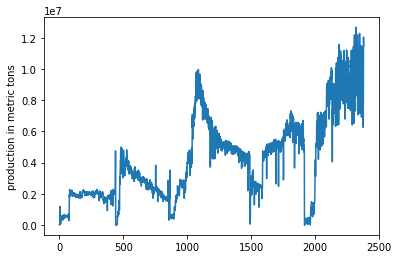

In [15]:
plt.plot(df_prod.prod_MT.values)
plt.ylabel('production in metric tons')

This plot does not really make sense, as the x index is just the index count. Let's look at 1 power plant. But it does point out you don't need to specify an x axis with plt.plot.

In [16]:
salton = df_prod[df_prod['field_name'] == 'saltons']

In [17]:
salton

,year,month,prod_MT,injection_MT,field_name,pro_minus_injection,day
1,1982.0,1.0,0.0,NaN,saltons,NaN,1
2,1982.0,2.0,23102.0,22711.0,saltons,391.0,1
3,1982.0,3.0,31557.0,30261.0,saltons,1296.0,1
4,1982.0,4.0,3908.0,2829.0,saltons,1079.0,1
5,1982.0,5.0,21273.0,19565.0,saltons,1708.0,1
...,...,...,...,...,...,...,...
461,2020.0,5.0,6258603.0,5446471.0,saltons,812132.0,1
462,2020.0,6.0,11185769.0,9239716.0,saltons,1946053.0,1
463,2020.0,7.0,12045690.0,10050834.0,saltons,1994856.0,1
464,2020.0,8.0,11526198.0,9689633.0,saltons,1836565.0,1


Let's make the date something senseable. Pandas handles dates pretty well once you get a hang of it. 

In [18]:
foo = salton[['year', 'month', 'day']].astype('int64')
salton['date'] = pd.to_datetime(foo)

salton.dtypes # note the dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year                          float64
month                         float64
prod_MT                       float64
injection_MT                  float64
field_name                     object
pro_minus_injection           float64
day                             int64
date                   datetime64[ns]
dtype: object

Let's drop row 1 since it does not have production or injection data.

In [19]:
salton = salton.drop(1)

In [20]:
salton.head(3)

,year,month,prod_MT,injection_MT,field_name,pro_minus_injection,day,date
2,1982.0,2.0,23102.0,22711.0,saltons,391.0,1,1982-02-01
3,1982.0,3.0,31557.0,30261.0,saltons,1296.0,1,1982-03-01
4,1982.0,4.0,3908.0,2829.0,saltons,1079.0,1,1982-04-01


This is for the entire field, which consists of mutiple power plants. More information is found [here](https://en.wikipedia.org/wiki/Imperial_Valley_Geothermal_Project). Trying to find a good resource on when the wells were drilled. 

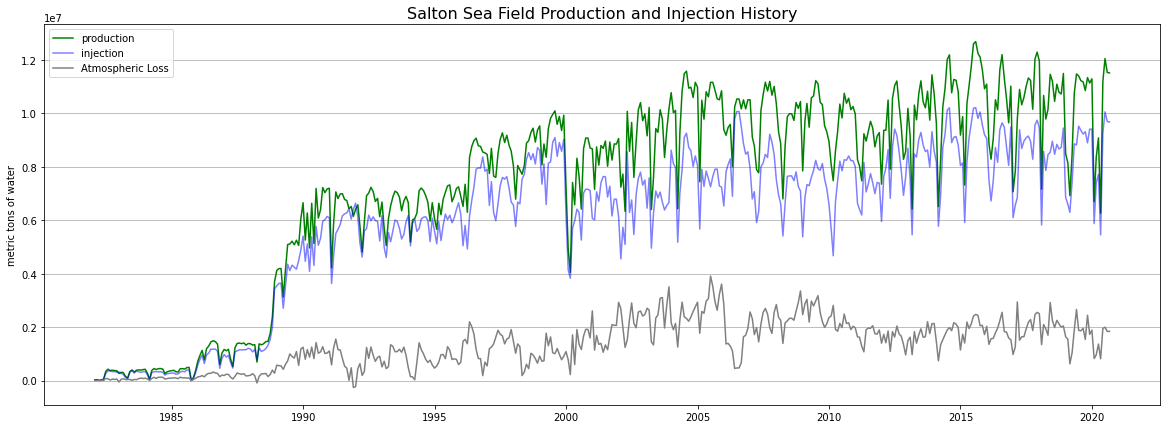

In [21]:
plt.figure(figsize=(20,7))
plt.title('Salton Sea Field Production and Injection History', size=16)
plt.plot(salton.date, salton.prod_MT, color='green', label='production')
plt.plot(salton.date, salton.injection_MT, color='blue', alpha=0.5, label='injection')
plt.ylabel('metric tons of water')

plt.plot(salton.date, salton.pro_minus_injection, color='grey', label='Atmospheric Loss')
plt.legend()
plt.grid(axis='y')

### fill between

Let's fill the inbetween space of production and 

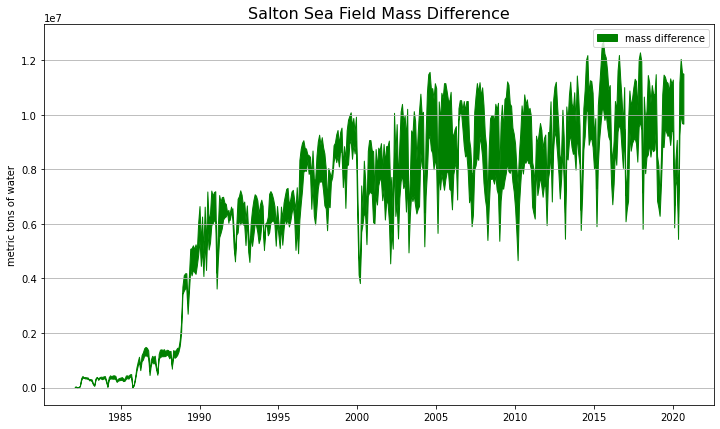

In [22]:
plt.figure(figsize=(12,7))
plt.title('Salton Sea Field Mass Difference', size=16)
plt.fill_between(salton.date, salton.prod_MT, salton.injection_MT,
                 color='green', label='mass difference')
plt.ylabel('metric tons of water')

plt.legend()
plt.grid(axis='y')

This looks oddly seasonal, lets dive into a subset.

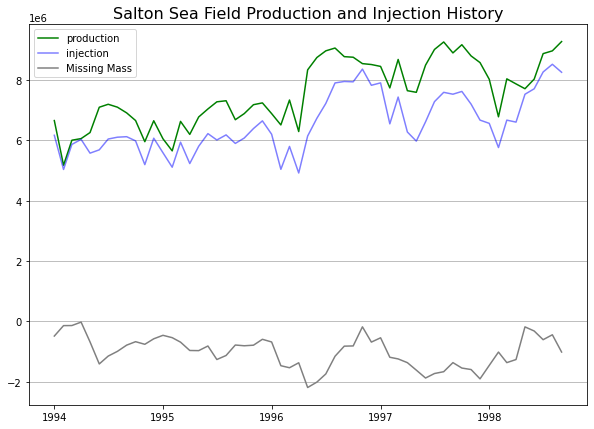

In [23]:
plt.figure(figsize=(10,7))
plt.title('Salton Sea Field Production and Injection History', size=16)
plt.plot(salton.date[143:200], salton.prod_MT[143:200], color='green', label='production')
plt.plot(salton.date[143:200], salton.injection_MT[143:200], color='blue', alpha=0.5, label='injection')

plt.plot(salton.date[143:200], -1*salton.pro_minus_injection[143:200], color='grey', label='Missing Mass')
plt.legend()
plt.grid(axis='y')

Looks like maintance around winter. Might coinside with lowest energy use in the state due to more AC use than heating in California. Neat.

### scatter

Same theme, let's dive into the seasonality using scatter plots.

Text(0.5, 0, 'Months')

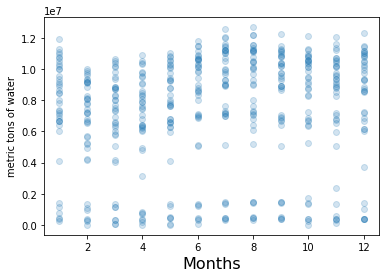

In [24]:
plt.scatter(salton.month, salton.prod_MT, alpha=0.2)
plt.ylabel('metric tons of water')
plt.xlabel('Months', size=16)

The first few years had low-ish production as it was ramping up. Let's just plot from 

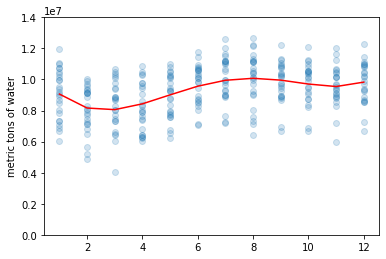

In [25]:
x = salton.month[143:440]
y = salton.prod_MT[143:440]
z = salton.injection_MT[143:440]
order = 5

plt.scatter(x, y, alpha=0.2)
plt.ylim([-1e2, 1.4e7])
plt.ylabel('metric tons of water')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, order))(np.unique(x)), color='r')

Looks like Feb-March is the lowest, a 5th order curve is probably a bit much. Feel free to play around with the order variable!

### bar chart

Let's use the same variable as above, but as a bar chart.

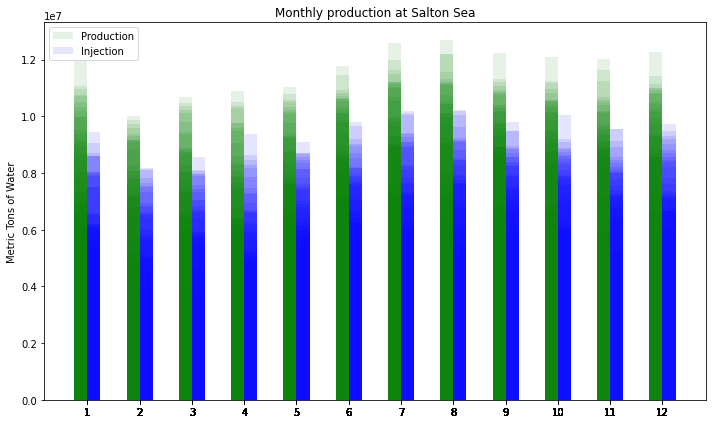

In [26]:

width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, y, width, color = 'green', alpha=0.1, label='Production')
rects2 = ax.bar(x + width/2, z, width, color = 'blue', alpha=0.1, label='Injection')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Tons of Water')
ax.set_title('Monthly production at Salton Sea')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()

While this does communcate some of the yearly variablity, does not do a great job.

## new subplot magic!

This is relatively new functionality. Blatantly borrowed from [here](https://matplotlib.org/stable/tutorials/provisional/mosaic.html#sphx-glr-tutorials-provisional-mosaic-py). Subplots are one of the more aggraviting things to put together. 

In [27]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

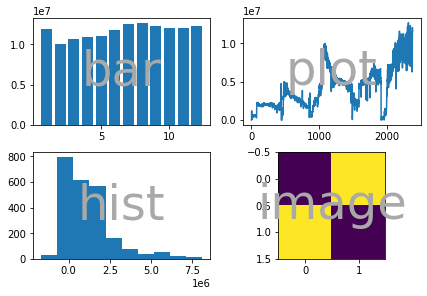

In [28]:
fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(
    [['bar',  'plot'],
     ['hist', 'image']])
ax_dict['bar'].bar(x, y)
ax_dict['plot'].plot(df_prod.prod_MT.values)
ax_dict['hist'].hist(df_prod.pro_minus_injection.values)
ax_dict['image'].imshow([[1, 2], [2, 1]])
identify_axes(ax_dict)

This is not an ideal way to show this data specifically, but when you want to do subplots I always have to look it up. Hopefully this can provide some inspiration! 

# seaborn

### violin plot

In [29]:
import seaborn as sns

Let's do a violin plot!

<AxesSubplot:title={'center':'Production'}, xlabel='month', ylabel='prod_MT'>

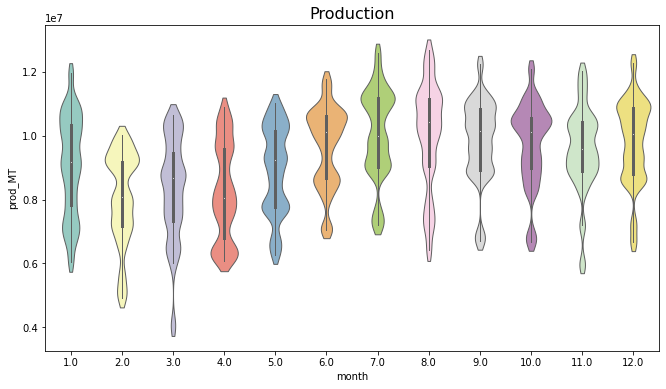

In [30]:
f, ax = plt.subplots(figsize=(11, 6))

plt.title('Production', size = 16)
sns.violinplot(x=x, y=y, palette="Set3", bw=.2, cut=1, linewidth=1)

Using a violin plot, it's easier to see the long tails, and that most of the data is pretty consistent. 

### line plot

In [31]:
salton

,year,month,prod_MT,injection_MT,field_name,pro_minus_injection,day,date
2,1982.0,2.0,23102.0,22711.0,saltons,391.0,1,1982-02-01
3,1982.0,3.0,31557.0,30261.0,saltons,1296.0,1,1982-03-01
4,1982.0,4.0,3908.0,2829.0,saltons,1079.0,1,1982-04-01
5,1982.0,5.0,21273.0,19565.0,saltons,1708.0,1,1982-05-01
6,1982.0,6.0,45043.0,42210.0,saltons,2833.0,1,1982-06-01
...,...,...,...,...,...,...,...,...
461,2020.0,5.0,6258603.0,5446471.0,saltons,812132.0,1,2020-05-01
462,2020.0,6.0,11185769.0,9239716.0,saltons,1946053.0,1,2020-06-01
463,2020.0,7.0,12045690.0,10050834.0,saltons,1994856.0,1,2020-07-01
464,2020.0,8.0,11526198.0,9689633.0,saltons,1836565.0,1,2020-08-01


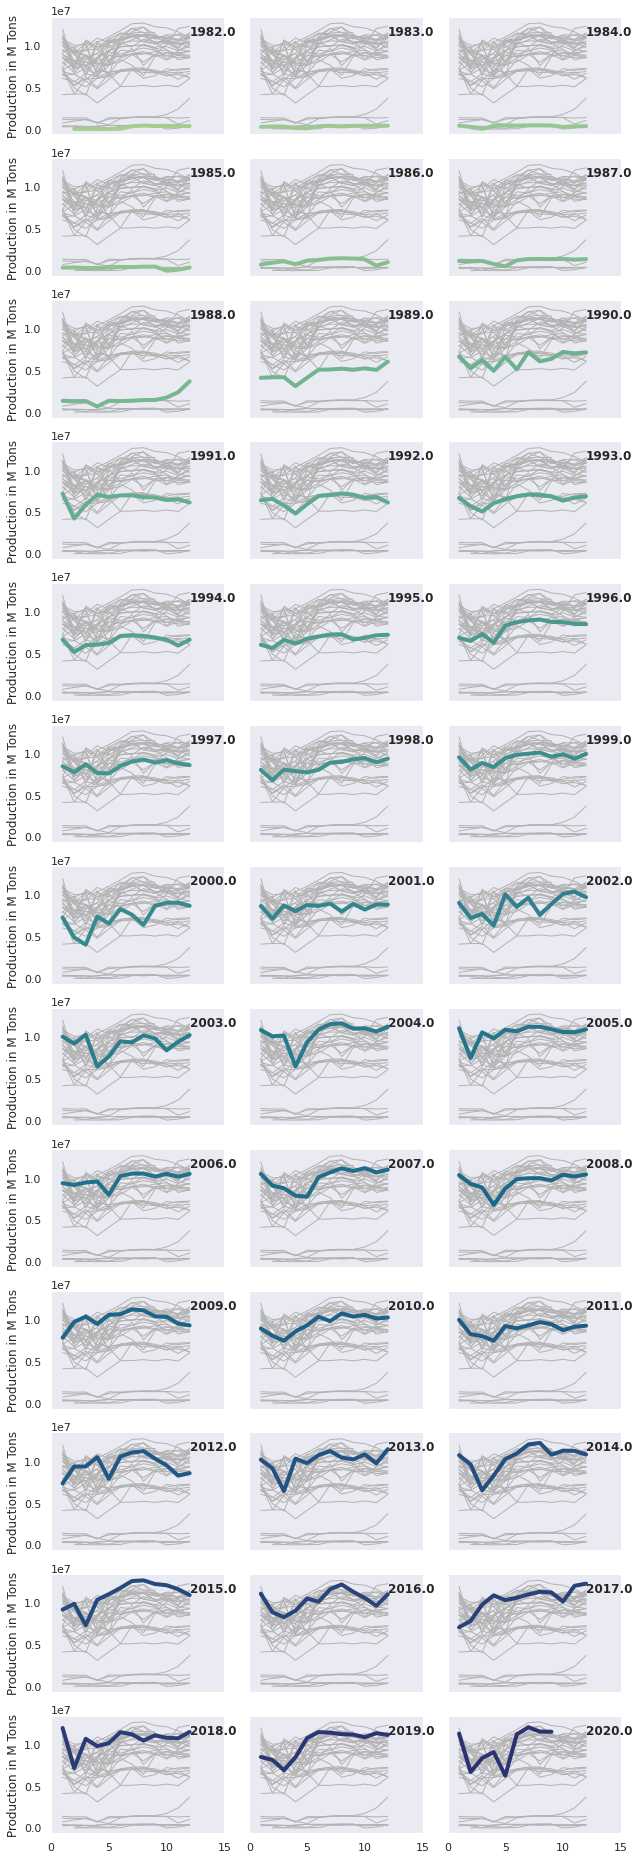

In [32]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=salton,
    x="month", y="prod_MT", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=salton, x="month", y="prod_MT", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Production in M Tons")
g.tight_layout()

.... don't know why the last plot has ~15 months. 

### scatter

<AxesSubplot:title={'center':'Salton Sea Production/Injection Comparison'}, xlabel='prod_MT', ylabel='injection_MT'>

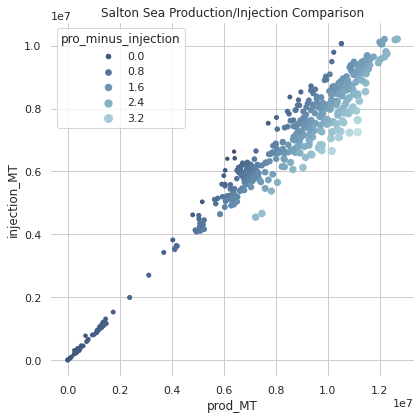

In [33]:
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset

f, ax = plt.subplots(figsize=(6.5, 6.5))

plt.title('Salton Sea Production/Injection Comparison')
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=salton.prod_MT, 
                y=salton.injection_MT,
                hue=salton.pro_minus_injection*10000, 
                size=salton.pro_minus_injection*10000,
                palette="ch:r=-.2,d=.3_r", 
                linewidth=0, 
                ax=ax)

### scatterplot matrix

Let's make a new, smaller dataframe of our entire dataset.

In [34]:
df_scatter = df_prod[['prod_MT', 'injection_MT', 'field_name']]
df_scatter

,prod_MT,injection_MT,field_name
1,2093.0,2077.0,casad
2,715.0,715.0,casad
3,17326.0,18084.0,casad
4,52951.0,52951.0,casad
5,1185043.0,894397.0,casad
...,...,...,...
461,6258603.0,5446471.0,saltons
462,11185769.0,9239716.0,saltons
463,12045690.0,10050834.0,saltons
464,11526198.0,9689633.0,saltons


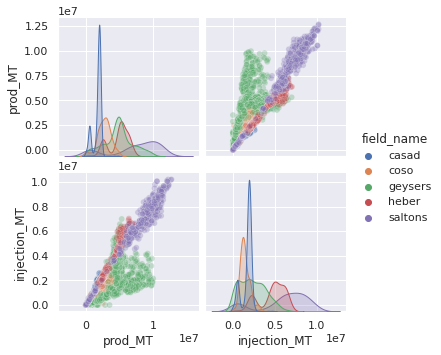

In [41]:
sns.set_theme(style="darkgrid")

sns.pairplot(df_scatter,
             hue='field_name',
             plot_kws={'alpha':0.3})

Seaborn themes are a great way to syle an entire plot. Some examples are [here](https://www.python-graph-gallery.com/104-seaborn-themes)

The production to injection should roughly be 1 to 1, to maintain subsurface mass balace. Check out Geysers! Note from Irene: 

*The Geysers is different from the others because it is a dry steam reservoir. In the early years of development is experienced dramatic decline. Now they take treated waste water from Santa Rosa in inject this into the reservoir to sustain the pressure.*

Here is a paper on [heber field](https://www.geothermal-energy.org/pdf/IGAstandard/WGC/2000/R0547.PDF) and a paper on [casa diablo (mammoth)](https://en.wikipedia.org/wiki/Mammoth_Geothermal_Complex).

# plotly express

plotly express is a wrapper for plotly, which makes syntax a bit easier to handle. This package is handy for making web apps with [Dash](https://dash.plotly.com/).

In [36]:
import plotly.graph_objs as go
import plotly.express as px

In [42]:
# Plotly figure 1
fig = px.line(salton, x='date', y='prod_MT',
              hover_name='prod_MT')

fig.update_traces(line_color='#456987')
fig.update_layout(title='Production & Injection' , showlegend=True)

# Plotly figure 2
fig2 = go.Figure(fig.add_traces(
                 data=px.line(salton, x='date', y='injection_MT',
                              hover_name="injection_MT")._data))
fig2.update_layout(title='Production & Injection' , showlegend=True)

fig2.show()

# Future Research Questions

The point of this was mainly to flex pythons plotting muscles, but after going through this data, some questions emerged for me:
1. Would be nice to plot this aginst number of wells drilled

2. Enegy capacity factor vs production of water would be a neat comparison for each field.

# 5 Minute break! See you soon